<a id="ref6"></a>

<h2>Code</h2>

I am going to use the MNIST dataset for my example.


Let's call imports and make the MNIST data available to use.


In [1]:
!pip install tensorflow==2.2.0rc0

     |████████████████████████████████| 515.9 MB 20 kB/s 
     |████████████████████████████████| 448 kB 59.0 MB/s 
     |████████████████████████████████| 2.9 MB 49.1 MB/s 
     |████████████████████████████████| 3.8 MB 52.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstallin

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')



In [3]:
# Import MINST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
y_train = y_train.astype('float32') / 255.
y_test = y_test.astype('float32') / 255.

In [6]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

I am using the tf.keras.layers.Flatten() function to prepare the training data to be compatible with the encoding and decoding layer


In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
flatten_layer = tf.keras.layers.Flatten()
x_train = flatten_layer(x_train)

Notice how the <code>x_train.shape</code>  changes from (60000,28,28) to (60000, 784)


In [9]:
print(x_train.shape)

(60000, 784)


Now, let's give the parameters that are going to be used by NN.


In [10]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10
global_step = tf.Variable(0)
total_batch = int(len(x_train) / batch_size)

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
encoding_layer = 32 # final encoding bottleneck features
n_input = 784 # MNIST data input (img shape: 28*28)



<h3> encoder </h3>
Now we need to create our encoder. For this, I am going to use tf.keras.layers.Dense with sigmoidal activation functions. Sigmoidal functions delivers great results with this type of network. This is due to having a good derivative that is well-suited to backpropagation. We can create our encoder using the sigmoidal function like this:


In [11]:

enocoding_1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
encoding_2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
encoding_final = tf.keras.layers.Dense(encoding_layer, activation=tf.nn.relu)

# Building the encoder
def encoder(x):
    x_reshaped = flatten_layer(x)
    # Encoder first layer with sigmoid activation #1
    layer_1 = enocoding_1(x_reshaped)
    # Encoder second layer with sigmoid activation #2
    layer_2 = encoding_2(layer_1)
    code = encoding_final(layer_2)
    return code

<h3> decoder </h3>

You can see that the layer\_1 in the encoder is the layer\_2 in the decoder and vice-versa.


In [12]:
decoding_1 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
decoding_2 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
decoding_final = tf.keras.layers.Dense(n_input)
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = decoding_1(x)
    # Decoder second layer with sigmoid activation #2
    layer_2 = decoding_2(layer_1)
    decode = self.decoding_final(layer_2)
    return decode

Let's construct our model.
We  define a <code>cost</code> function to calculate the loss  and a <code>grad</code> function to calculate gradients that will be used in backpropagation.


In [13]:
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.n_hidden_1 = n_hidden_1 # 1st layer num features
        self.n_hidden_2 = n_hidden_2 # 2nd layer num features
        self.encoding_layer = encoding_layer
        self.n_input = n_input # MNIST data input (img shape: 28*28)

        self.flatten_layer = tf.keras.layers.Flatten()
        self.enocoding_1 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.encoding_2 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.encoding_final = tf.keras.layers.Dense(self.encoding_layer, activation=tf.nn.relu)
        self.decoding_1 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.sigmoid)
        self.decoding_2 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.sigmoid)
        self.decoding_final = tf.keras.layers.Dense(self.n_input)


    # Building the encoder
    def encoder(self,x):
        #x = self.flatten_layer(x)
        layer_1 = self.enocoding_1(x)
        layer_2 = self.encoding_2(layer_1)
        code = self.encoding_final(layer_2)
        return code
        

    # Building the decoder
    def decoder(self, x):
        layer_1 = self.decoding_1(x)
        layer_2 = self.decoding_2(layer_1)
        decode = self.decoding_final(layer_2)
        return decode

        
    def call(self, x):
        encoder_op  = self.encoder(x)
        # Reconstructed Images
        y_pred = self.decoder(encoder_op)
        return y_pred
        
def cost(y_true, y_pred):
    loss = tf.losses.mean_squared_error(y_true, y_pred)
    cost = tf.reduce_mean(loss)
    return cost

def grad(model, inputs, targets):
    #print('shape of inputs : ',inputs.shape)
    #targets = flatten_layer(targets)
    with tf.GradientTape() as tape:    
        reconstruction = model(inputs)
        loss_value = cost(targets, reconstruction)
    return loss_value, tape.gradient(loss_value, model.trainable_variables),reconstruction

For training let's run for 20 epochs.


In [14]:
model = AutoEncoder()
optimizer = tf.keras.optimizers.RMSprop(learning_rate)

for epoch in range(training_epochs):
    for i in range(total_batch):
        x_inp = x_train[i : i + batch_size]
        loss_value, grads, reconstruction = grad(model, x_inp, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(loss_value))

print("Optimization Finished!")

Epoch: 0001 cost= 0.046926983
Epoch: 0002 cost= 0.035175674
Epoch: 0003 cost= 0.026539490
Epoch: 0004 cost= 0.022758294
Epoch: 0005 cost= 0.017041106
Epoch: 0006 cost= 0.013607651
Epoch: 0007 cost= 0.010766493
Epoch: 0008 cost= 0.009760739
Epoch: 0009 cost= 0.008640604
Epoch: 0010 cost= 0.007635312
Epoch: 0011 cost= 0.007175476
Epoch: 0012 cost= 0.007013664
Epoch: 0013 cost= 0.006041030
Epoch: 0014 cost= 0.005508082
Epoch: 0015 cost= 0.005151733
Epoch: 0016 cost= 0.004898822
Epoch: 0017 cost= 0.004873007
Epoch: 0018 cost= 0.004563102
Epoch: 0019 cost= 0.004375327
Epoch: 0020 cost= 0.004508412
Optimization Finished!


Apply encoder and decoder for our tests.


In [15]:
# Applying encode and decode over test set
encode_decode = model(flatten_layer(x_image_test[:examples_to_show]))

Visualize our graphs!


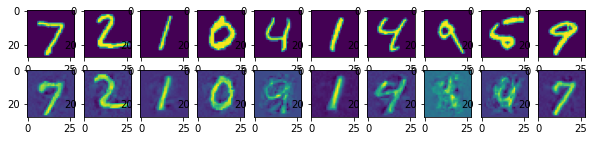

In [16]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(x_image_test[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

As you can see, the reconstructions were successful. It can be seen that some noise were added to the image.
